In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

# Detecting oulier using z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [13]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers    

In [14]:
outliers_pt=detect_outliers(dataset)

In [24]:
print(outliers_pt)

[102, 107, 108]


## Using IQR method

#Steps

Arrange the data in increasing order

Calculate first(q1) and third quartile(q3)

Find interquartile range (q3-q1) 4.Find lower bound (q1-1.5IQR) 5.Find upper bound (q3+1.5IQR)

Anything that lies outside of lower and upper bound is an outlier

In [16]:
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [51]:
q1,q3=np.percentile(dataset,[25,75])

In [52]:
print(q1,q3)

12.0 15.0


In [53]:
iqr=q3-q1
print(iqr)

3.0


In [54]:
lower_bound=q1-(1.5)*iqr
upper_bound=q3+(1.5)*iqr

In [55]:
lower_bound

7.5

In [56]:
upper_bound

19.5

## Using Z score

In [57]:
df=pd.read_csv(r"C:\Users\ishit\OneDrive\Desktop\ca\datasets\placement (1).csv")

In [58]:
df.shape

(1000, 3)

In [59]:
df.sample(5)

,cgpa,placement_exam_marks,placed
525,6.33,17.0,0
488,6.75,43.0,0
564,7.17,34.0,1
87,6.96,19.0,1
470,6.46,28.0,0


C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


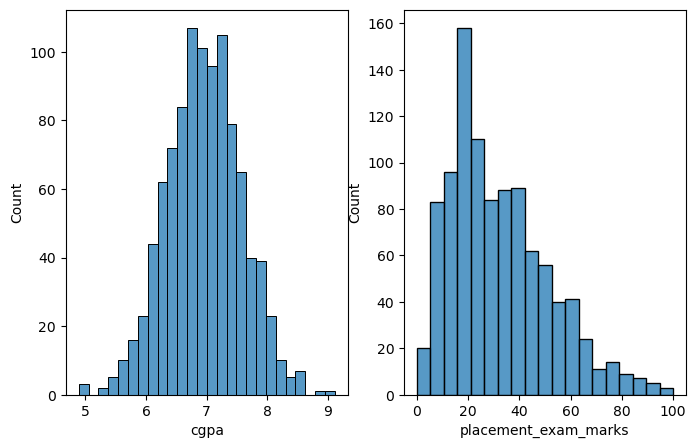

In [60]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

#curve of cgpa shows normal distribution likely but placement_exam_marks is skewed
#apply z sciore method only to cgpa

In [61]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [62]:
print("Mean value of cgpa: ",df.cgpa.mean())
print("Std value of cgpa:",df.cgpa.std())
print("Min value of cgpa:",df.cgpa.min())
print("Max value of cgpa:",df.cgpa.max())

Mean value of cgpa:  6.96124
Std value of cgpa: 0.6158978751323894
Min value of cgpa: 4.89
Max value of cgpa: 9.12


In [63]:
#finding upper bound and lower bound values
upper_bound=df.cgpa.mean()+3*(df.cgpa.std())
lower_bound=df.cgpa.mean()-3*(df.cgpa.std())
print("Upper bound:",upper_bound)
print("Lower bound:",lower_bound)

Upper bound: 8.808933625397168
Lower bound: 5.113546374602832


In [64]:
#find outliers
outliers=df[(df.cgpa>upper_bound)| (df.cgpa<lower_bound)]
outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

remove outliers

In [65]:
new_df=df[(df.cgpa<upper_bound)&(df.cgpa>lower_bound)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [75]:
#Approach 2 #calculate the z score #z=(x-mean)/std
df['cgpa_zscore']=(df.cgpa-df.cgpa.mean())/df.cgpa.std()

In [76]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [77]:
#outliers greter than upper bound
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [78]:
#outliers less than lower bound
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [79]:
#all outliers
df[(df['cgpa_zscore']>3)| (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [82]:
#Trimming
new_df=df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [86]:
upper_bound=df.cgpa.mean()+3*(df.cgpa.std())
lower_bound=df.cgpa.mean()-3*(df.cgpa.std())

In [87]:
print("Upper bound:",upper_bound)
print("Lower bound:",lower_bound)

Upper bound: 8.808933625397168
Lower bound: 5.113546374602832


In [88]:
df['cgpa']=np.where(
df['cgpa']>upper_bound,
upper_bound,
np.where(df['cgpa']<lower_bound,
lower_bound,
df['cgpa']))


In [94]:
df.shape  #nothing is deleted,just changed outlier values with upper and lower bound values

(1000, 4)

In [95]:
df.cgpa.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# Using IQR Method

In [96]:
#as we have seen previously by graphs that the placement_exam_marks distribution was not normal and was skewed
#we apply iqr method to skewed distribution

In [97]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

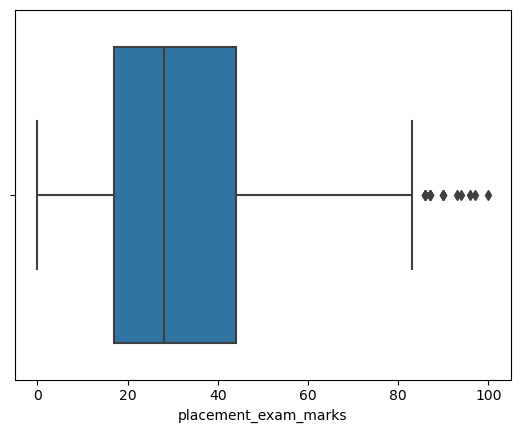

In [101]:
sns.boxplot(x=df['placement_exam_marks'])

In [109]:
#can aslo use below method to find out percentile
#percentile25=np.percentile(df['placement_exam_marks'],25)
#percentile75=np.percentile(df['placement_exam_marks'],75)

In [112]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
print(percentile25)
print(percentile75)

17.0
44.0


In [114]:
iqr=percentile75-percentile25
iqr

27.0

In [115]:
upper_bound=percentile75+1.5*iqr
lower_bound=percentile25-1.5*iqr

In [116]:
print("Upper bound:",upper_bound)
print("Lower bound:",lower_bound)

Upper bound: 84.5
Lower bound: -23.5


In [125]:
#outliers #15 outliers present here
outliers=df[(df['placement_exam_marks']>upper_bound) | (df['placement_exam_marks']<lower_bound)]
outliers

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


# Trimming

#remove outliers

In [126]:
new_df=df[(df['placement_exam_marks']>lower_bound) & (df['placement_exam_marks']<upper_bound)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


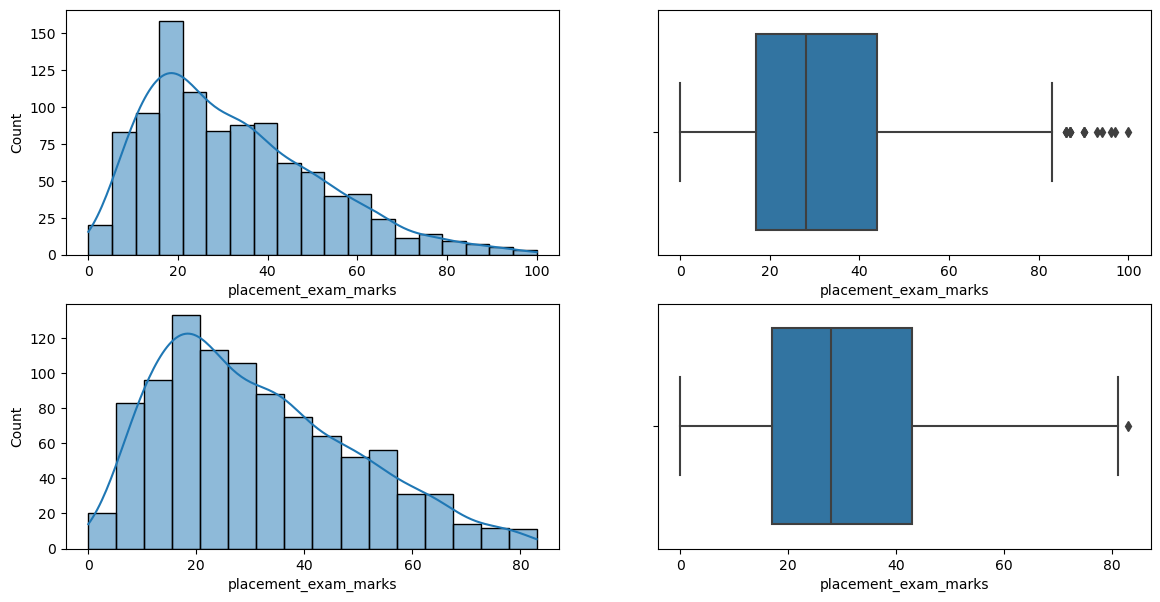

In [142]:
# Comparing
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()

## Capping 

In [144]:
#outliers not removed here their values are replaced by upper and lower bound values

In [145]:
new_df_cap=df.copy()

In [159]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_bound,
    upper_bound,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_bound,
        lower_bound,
        new_df_cap['placement_exam_marks']
    )
)

In [160]:
new_df_cap.shape

(1000, 4)

C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


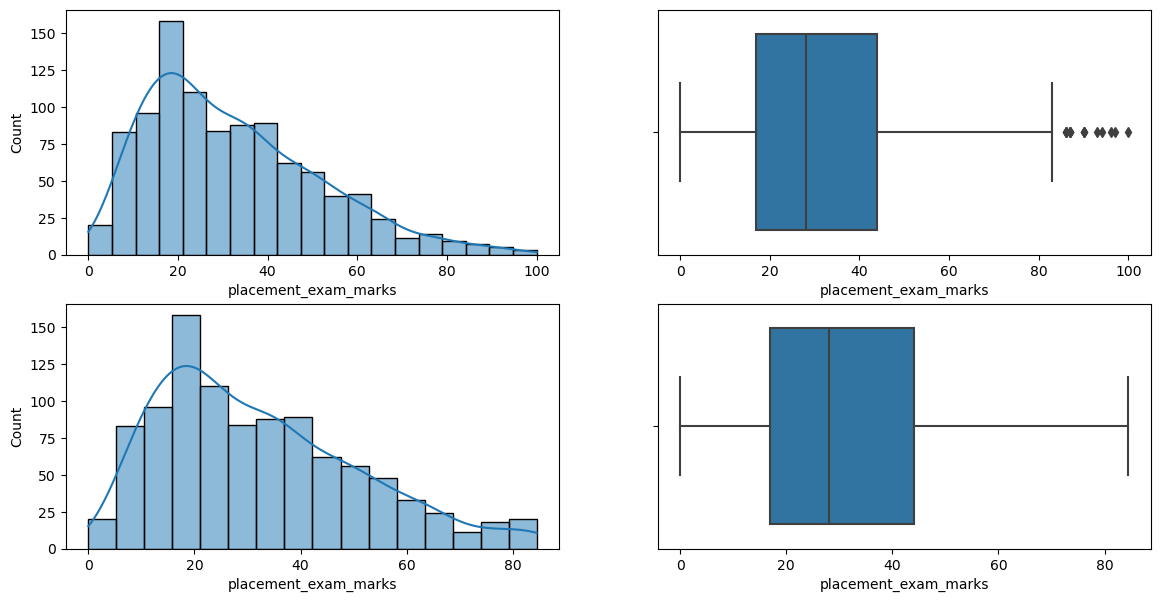

In [164]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.show()


# Percentile Method

we decide a percentile say 1 percentile then upper bound becomes 99 percentile and lower bound is 1 percentile and values above and below are considered outliers and either trimmed or removed

In [165]:
df=pd.read_csv(r"C:\Users\ishit\OneDrive\Desktop\ca\datasets\weight-height.csv")

In [166]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [167]:
df.shape

(10000, 3)

In [168]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

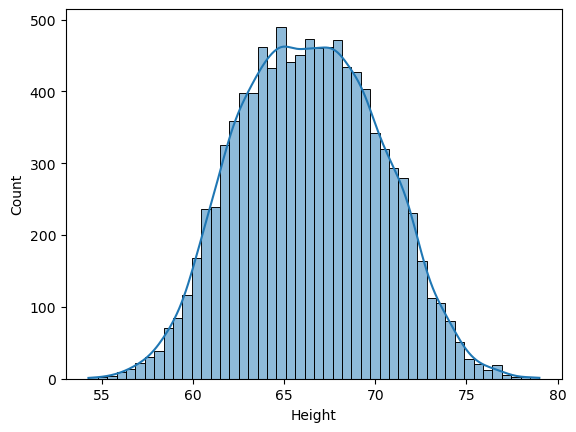

In [169]:
sns.histplot(df['Height'],kde=True)

<Axes: xlabel='Height'>

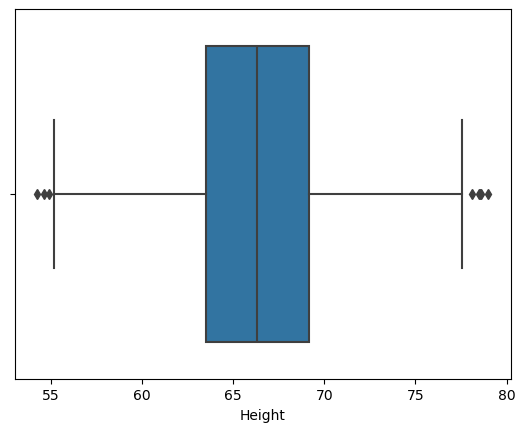

In [170]:
sns.boxplot(x=df['Height'])

In [172]:
upper_bound=df['Height'].quantile(0.99)
lower_bound=df['Height'].quantile(0.01)

In [173]:
print("Upper Bound:",upper_bound)
print("Lower Bound:",lower_bound)

Upper Bound: 74.7857900583366
Lower Bound: 58.13441158671655


# Trimming

In [174]:
new_df=df[(df['Height']<upper_bound)&(df['Height']>lower_bound)]

In [175]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [176]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [177]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

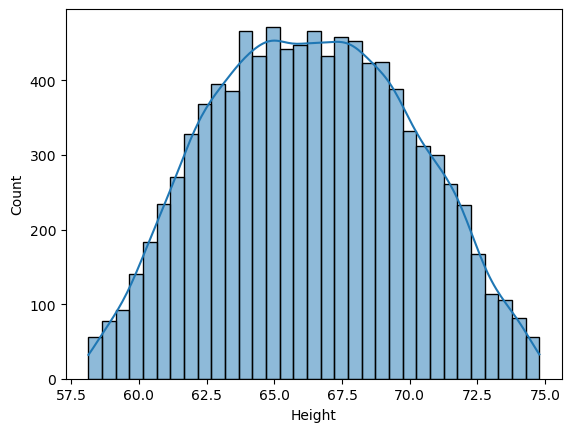

In [179]:
sns.histplot(new_df["Height"],kde=True)

<Axes: xlabel='Height'>

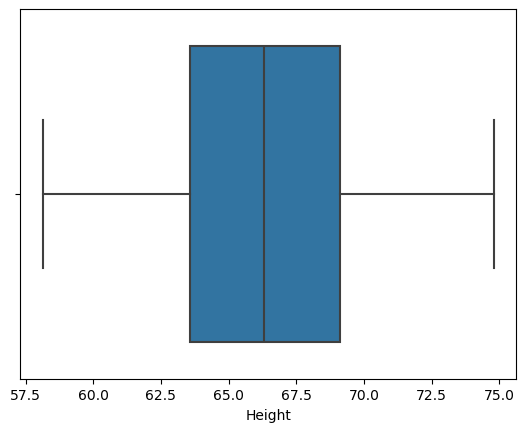

In [180]:
sns.boxplot(x=new_df['Height'])

# Capping (Winsorization)

In [189]:
df['Height']=np.where(df["Height"]>=upper_bound,upper_bound,
                     np.where(df["Height"]<=lower_bound,lower_bound,df["Height"]))

In [190]:
df.shape

(10000, 3)

In [191]:
df["Height"].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

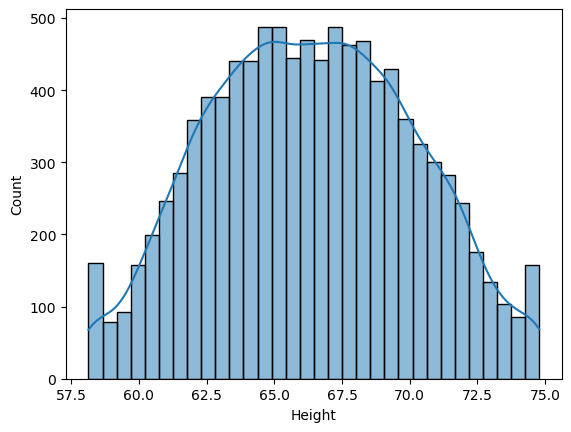

In [192]:
sns.histplot(df["Height"],kde=True)

<Axes: xlabel='Height'>

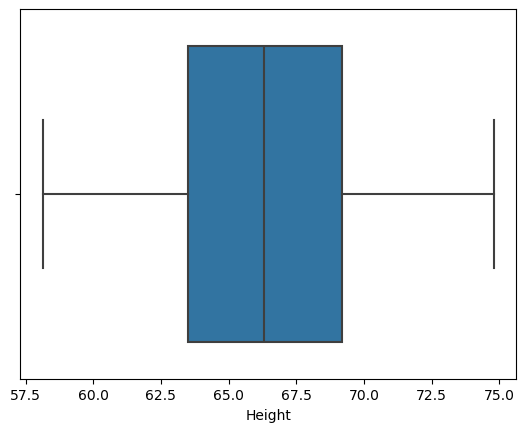

In [193]:
sns.boxplot(x=df['Height'])